# Cobify consumption data conclusions

First, we import modules and clean data. We create dummies for each type of fuel.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.functions import *

#%% Import data

raw_df = pd.read_excel('data/measurements2.xlsx')

#%% Clean data

df = raw_df.copy()

# Drop two last columns
df = df.iloc[:, :-2]

# Drop `specials` column
df = df.drop('specials', axis = 1)

# Create dummies for `gas_type`
df = pd.get_dummies(df, columns = ['gas_type'])

# Apply forward fill to `temp_inside`
df['temp_inside'] = df['temp_inside'].fillna(method = 'ffill')

# Create columns for speed squared
df['speed2'] = df['speed'] ** 2

We assessed whether the fuel type impacts consumption. To do so, we perform multiple lineal regressions with several combinations of independent variables. All of the variables present in the final models have p-values under 0.05. For each model, the p-value of the hypothesis that there is a statistically significant difference between the coefficients of both fuels. To put it simply, we test whether one fuel makes the car cosume more.

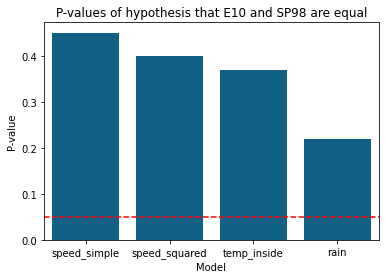

In [7]:
#%% Tunned OLS models

models = {
    'speed_simple' : ['speed',
            'gas_type_E10', 
            'gas_type_SP98',
            ],
    'speed_squared' : ['speed',
            'speed2',
            'gas_type_E10', 
            'gas_type_SP98',
            ],
    'temp_inside' : ['speed',
            'speed2',
            'gas_type_E10', 
            'gas_type_SP98',
            'temp_inside'],
    'rain' : ['speed',
            'speed2',
            'gas_type_E10', 
            'gas_type_SP98',
            'temp_inside',
            'rain']}

models_dic = {} # Model name, p-value of hypothesis that consume is equal for each carburant

# Compute all models, obtain results and save them in a dictionary
for name, indep_vars in models.items():
    dep_var = 'consume'
    indep_var = indep_vars

    reg = clean_reg(dep_var, indep_var, df,
                    intercept = True)

    models_dic[name] = {
                        'E10' : round(reg.params['gas_type_E10'], 3),
                        'SP98' : round(reg.params['gas_type_SP98'], 3),
                        'pvalue' : round(float(reg.t_test('gas_type_E10 = gas_type_SP98').pvalue), 2)
    }

# Plot model results
models_df = pd.DataFrame(models_dic)
pvalues = models_df.loc['pvalue']

hyp_pvalues = sns.barplot(x = models_df.columns, y = pvalues, color = '#006699');

# Add a horizontal line at 0.05
hyp_pvalues.axhline(y = 0.05, color = 'r', linestyle = '--')
hyp_pvalues.set_title('P-values of hypothesis that E10 and SP98 are equal')
hyp_pvalues.set_xlabel('Model')
hyp_pvalues.set_ylabel('P-value');

The red dashed line represents the 0.05 threshold. As we can see, all bars break through this threshold, which means that, regardless of the model chosen, there is no way to prove that there is a difference in consumption. Nevertheless, the SP98 fuel presents slightly lower consumption in all models. 

Having no difference in consumption makes an argument supporting that we should opt for the E10 fuel due to its lower price.